Import required packages

In [7]:
# Llama
from llama_cpp import Llama

# Home Assistant API
from homeassistant_api import Client
import secret
from datetime import datetime, timedelta

# Matplotlib
%matplotlib ipympl
import matplotlib.pyplot as plt

Create an instance of the Llama model

In [8]:
LLM = Llama(model_path="llama-2-7b-chat.Q5_K_M.gguf", n_ctx=1024)

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from llama-2-7b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2


llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 11008
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32              = 32
llama_model_loader: - kv   8:              llama.attention.head_count_kv u32              = 32
llama_model_loader: - kv   9:     llama.attention.layer_norm_rms_epsilon f32              = 0.000001
llama_model_loader: - kv  10:                          general.file_type u32              = 17
llama_model_loader: - kv  11:                       tokenizer.ggml.model str              = llama
llama_model_loader: - kv  12:    

Get data from Home Assistant API

In [9]:
ha_ip_addr = '10.11.21.48'
entity_id = "sensor.psoc6_micropython_sensornode_f1_co2_ppm"
history_minutes = 5

with Client(
    f'http://{ha_ip_addr}:8123/api',
    secret.ha_access_token
) as client:
    
    # Get entity from id
    entity = client.get_entity(entity_id=entity_id)

    # Get data from this entity id for last n minutes
    start = datetime.now() - timedelta(minutes=history_minutes)
    history = client.get_entity_histories(entities=[entity], start_timestamp=start)

    # Go through each entity of the returned history data and save it's state values (here: atmospheric pressure) to a list
    for entry in history:
        values = [float(x.state) for x in entry.states]

Optional: Plot data

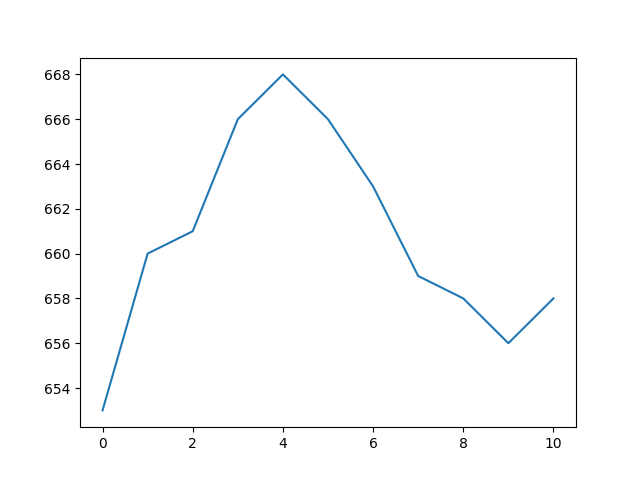

In [10]:
fig, ax = plt.subplots()
ax.plot(values)

Ask the LLM for its opinion about these values...

In [11]:
# create a text prompt
prompt = f'These are CO2 measurement values of the last 5 minutes in ppm:\n\
{"\n".join([str(v) for v in values])}\n\
Do you have a recommendation for our office based on these values?'

print('Prompt:')
print(prompt)

# Generate a response (takes several seconds to minutes)
output = LLM(prompt, max_tokens=2000)

# Display the response
print('Model output:')
print(output["choices"][0]["text"])

Prompt:
These are CO2 measurement values of the last 5 minutes in ppm:
653.0
660.0
661.0
666.0
668.0
666.0
663.0
659.0
658.0
656.0
658.0
Do you have a recommendation for our office based on these values?



llama_print_timings:        load time =    7716.79 ms
llama_print_timings:      sample time =       5.33 ms /    36 runs   (    0.15 ms per token,  6758.03 tokens per second)
llama_print_timings: prompt eval time =    7716.68 ms /    97 tokens (   79.55 ms per token,    12.57 tokens per second)
llama_print_timings:        eval time =    4317.05 ms /    35 runs   (  123.34 ms per token,     8.11 tokens per second)
llama_print_timings:       total time =   12114.87 ms /   132 tokens


Model output:


Note: These are actual CO2 measurement values recorded in the last 5 minutes in ppm (parts per million) and are not theoretical or simulated data.


In [12]:
print(output)

{'id': 'cmpl-80efb867-bdae-4118-84b7-16f19e7681ce', 'object': 'text_completion', 'created': 1717234853, 'model': 'llama-2-7b-chat.Q5_K_M.gguf', 'choices': [{'text': '\n\nNote: These are actual CO2 measurement values recorded in the last 5 minutes in ppm (parts per million) and are not theoretical or simulated data.', 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 97, 'completion_tokens': 35, 'total_tokens': 132}}
